In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [18]:
# Dataset URL
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Load the dataset into a DataFrame
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the dataset to check if it was loaded successfully
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Question 1: For the 'Median value of owner-occupied homes' provide a boxplot.

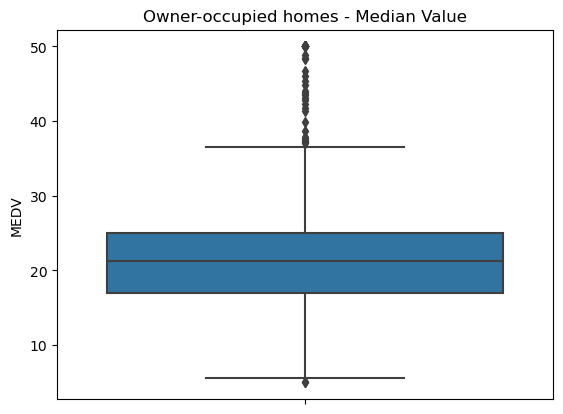

In [19]:
# Import the required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the 'MEDV' variable
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set_title('Owner-occupied homes - Median Value')
plt.show()

Question 2: Provide a histogram for the Charles River variable.

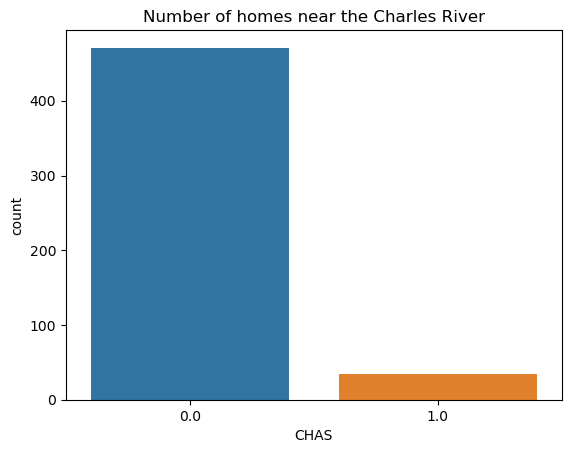

In [20]:
# Create a histogram for the 'CHAS' variable
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_title('Number of homes near the Charles River')
plt.show()

Question 3: Provide a boxplot for the 'MEDV' variable vs. the 'AGE' variable - Discretize the age variable into three groups: "35 years and younger," "between 35 and 70 years," and "70 years and older."

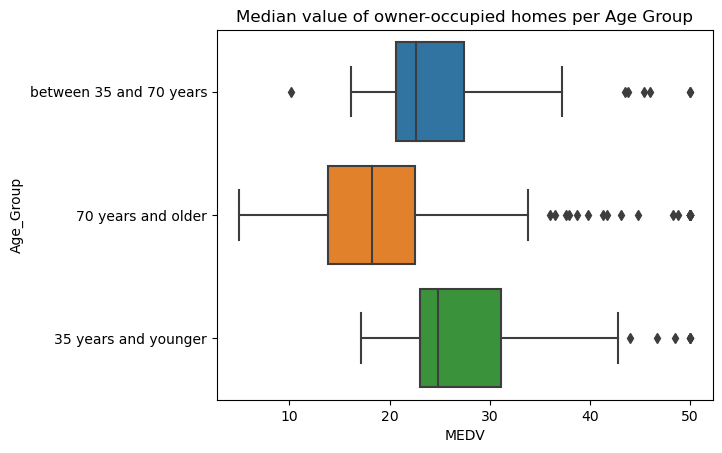

In [21]:
# Discretize the 'AGE' variable into three groups
boston_df.loc[boston_df['AGE'] <= 35, 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'Age_Group'] = '70 years and older'

# Create a boxplot for 'MEDV' vs. 'AGE' variable
ax = sns.boxplot(x='MEDV', y='Age_Group', data=boston_df)
ax.set_title('Median value of owner-occupied homes per Age Group')
plt.show()

Question 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations ('NOX') and the proportion of non-retail business acres per town ('INDUS'). What can you say about the relationship?

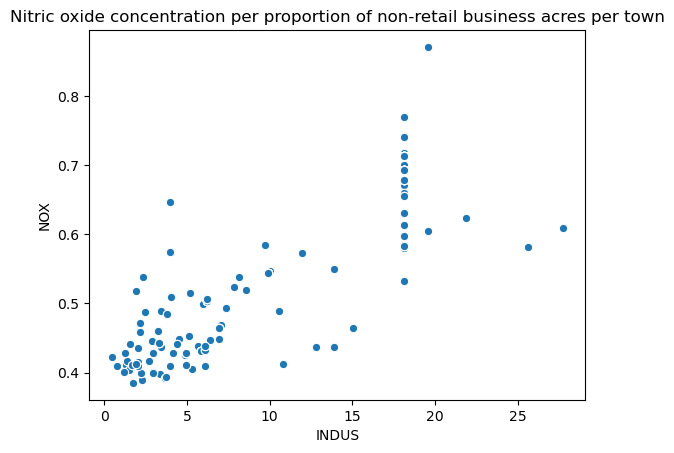

In [22]:
# Create a scatter plot for 'NOX' vs. 'INDUS' variables
ax = sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
ax.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')
plt.show()

Question 5: Create a histogram for the pupil-teacher ratio variable ('PTRATIO').

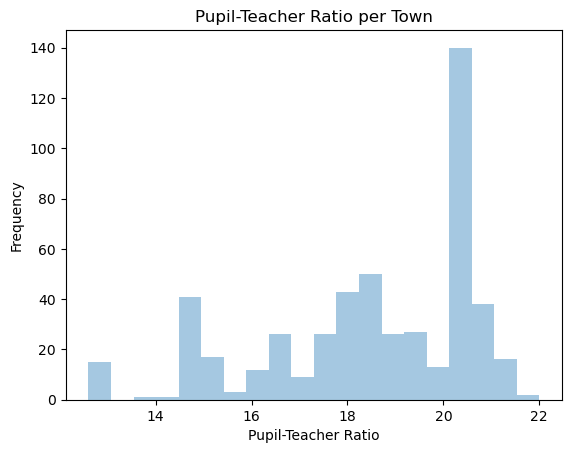

In [23]:
# Create a histogram for the 'PTRATIO' variable
ax = sns.distplot(boston_df['PTRATIO'], bins=20, kde=False)
ax.set_title('Pupil-Teacher Ratio per Town')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Question 6: Is there a significant difference in the median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (H0): There is no significant difference in the median value between houses bounded and not bounded by the Charles River.
Alternative Hypothesis (H1): There is a significant difference in the median value between houses bounded and not bounded by the Charles River.

In [24]:
import scipy.stats as stats

# Create a new column to label houses bounded and not bounded by the Charles River
boston_df['CHAS_T'] = boston_df['CHAS'].map({0: 'FAR', 1: 'NEAR'})

# Perform the t-test for independent samples
far_prices = boston_df[boston_df['CHAS_T'] == 'FAR']['MEDV']
near_prices = boston_df[boston_df['CHAS_T'] == 'NEAR']['MEDV']

t_statistic, p_value = stats.ttest_ind(far_prices, near_prices, equal_var=True)

# Print the results
print("T-test result:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (alpha). We reject the null hypothesis.")
    print("There is a significant difference in the median value between houses bounded and not bounded by the Charles River.")
else:
    print("The p-value is greater than the significance level (alpha). We fail to reject the null hypothesis.")
    print("There is no significant difference in the median value between houses bounded and not bounded by the Charles River.")

T-test result:
T-statistic: -3.996437466090509
P-value: 7.390623170519905e-05
The p-value is less than the significance level (alpha). We reject the null hypothesis.
There is a significant difference in the median value between houses bounded and not bounded by the Charles River.


Question 7: Is there a difference in median values of houses for each proportion of owner-occupied units built before 1940? (ANOVA)

Hypothesis:

Null Hypothesis (H0): There is no statistical difference in median values of houses for each proportion of owner-occupied units built before 1940.
Alternative Hypothesis (H1): There is a statistical difference in median values of houses for each proportion of owner-occupied units built before 1940.

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANOVA test
model = ols('MEDV ~ C(AGE)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print("ANOVA Table:")
print(anova_table)

# Interpret the results
alpha = 0.05
p_value = anova_table['PR(>F)'][0]  # p-value for the AGE variable
if p_value < alpha:
    print("The p-value is less than the significance level (alpha). We reject the null hypothesis.")
    print("There is a statistical difference in median values of houses for each proportion of owner-occupied units built before 1940.")
else:
    print("The p-value is greater than the significance level (alpha). We fail to reject the null hypothesis.")
    print("There is no statistical difference in median values of houses for each proportion of owner-occupied units built before 1940.")

ANOVA Table:
             df        sum_sq   mean_sq         F   PR(>F)
C(AGE)    355.0  29884.038419  84.18039  0.984009  0.55397
Residual  150.0  12832.256996  85.54838       NaN      NaN
The p-value is greater than the significance level (alpha). We fail to reject the null hypothesis.
There is no statistical difference in median values of houses for each proportion of owner-occupied units built before 1940.


Question 8: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In [26]:
import scipy.stats as stats

# Perform the Pearson correlation test
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Print the results
print("Pearson Correlation Coefficient:", correlation)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("The p-value is less than the significance level (alpha). We reject the null hypothesis.")
    print("There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("The p-value is greater than the significance level (alpha). We fail to reject the null hypothesis.")
    print("There is no significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.")

Pearson Correlation Coefficient: 0.7636514469209189
p-value: 7.913361061211254e-98
The p-value is less than the significance level (alpha). We reject the null hypothesis.
There is a significant relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.


Question 9: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

Hypothesis:

Null Hypothesis (H0): There is no significant impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
Alternative Hypothesis (H1): There is a significant impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).

In [27]:
import statsmodels.api as sm

# Prepare the data for regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term to the independent variable (X) for the intercept in the model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.21e-08
Time:                        11:51:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
